# ML_SP22_Project_2 (Classical Machine Learning Model Building)

### Due Date: 5/2 23:59 pm

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [3]:
# include your Project 1 Decision Tree Model as well
from DT_Humaira_Qadeer import DecisionTreeModel
from DT_Humaira_Qadeer import RandomForestModel

### Original dataset was based on
https://archive.ics.uci.edu/ml/datasets/wine+quality

### However, we will be using a slightly modified version of the dataset as follow

In [4]:
df = pd.read_csv("wine-tasting.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol,type,pHValue,taste
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,0.45,8.8,white,very acidic,normal
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,0.49,9.5,white,quite acidic,normal
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,0.44,10.1,white,quite acidic,normal
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,0.40,9.9,white,very acidic,normal
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,0.40,9.9,white,very acidic,normal


<AxesSubplot:xlabel='taste', ylabel='count'>

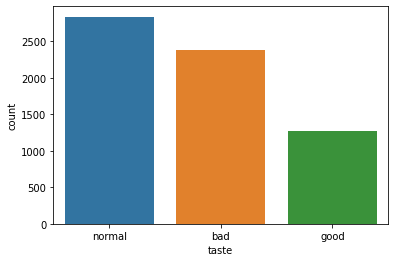

In [5]:
sns.countplot(x='taste',data=df)

<AxesSubplot:xlabel='taste', ylabel='count'>

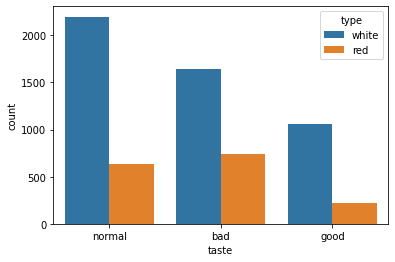

In [6]:
sns.countplot(x='taste', hue='type', data=df)

### Your task in this Project is to build the best predictive model to predict if a wine will be of good taste (ie we do not care if it is normal or bad taste, just good vs not good taste)

***You should follow the usual best practice in building models such as***

* EDA (chekcing missing values, removing outliers)
* performed basic exploration of relationship, with plots and graphs
* separated data set into training and testing
* setup dummy variables to take care categorical variables
* normalize numerical features if needed
* tried at least three (one of them is your own decision tree) models and checked their model performance
* performed cross-validations (f1-score)

***You should have also done the following***

* Try at least 3 models you have learned in class such as Logistic, Decision Tree, Random Forecast.
* Compare the sklearn Decision Tree with your own Decision Tree implementation results
* Include at least one ensemble models
* Identify out of all those you have tried, which one is the best model.

* For the best fitted model, does it work better for the Red wine or White wine or similar
* Can ensemble methods improve your models?
* Whether the categorical variable pH Value is important or not. If it is important, and you need to make a prediction for one instance where the pH value is missing, how would you proceed?

***And answer the following questions based on what you observe from your model building process***

# Exploratory Data Analysis

observing amount of rows and columns of data, finding missing data, determining types for each variable


In [7]:
df.shape

(6498, 13)

In [8]:
#total amount of missing values for each column
print(df.isnull().sum())

fixed acidity           1
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
sulphates               0
alcohol                 0
type                    0
pHValue                 0
taste                   0
dtype: int64


In [9]:
#data types for each column
print(df.dtypes)

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
sulphates               float64
alcohol                 float64
type                     object
pHValue                  object
taste                    object
dtype: object


In [10]:
#display rows with columns containing empty data
df[df.isnull().any(axis = 1)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol,type,pHValue,taste
36,NaN,0.28,0.43,1.7,0.08,21.0,123.0,0.9905,0.42,12.8,white,very acidic,bad


In [11]:
#remove rows with missing data
print(df.dropna(axis = 0, inplace = True))

None


In [12]:
#making sure row was dropped correctly
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
sulphates               0
alcohol                 0
type                    0
pHValue                 0
taste                   0
dtype: int64

In [13]:
#check to see missing values
df.isnull().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
sulphates               False
alcohol                 False
type                    False
pHValue                 False
taste                   False
dtype: bool

In [14]:
df.shape

(6497, 13)

one row with missing value removed

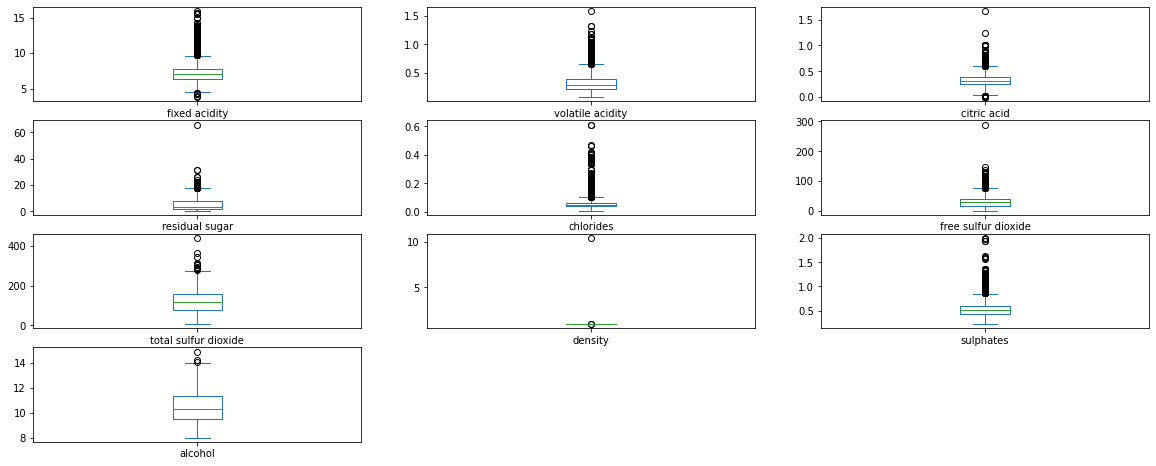

In [15]:
df.plot(kind='box', subplots=True, layout=(4,3), legend=True, figsize=(20,8))
plt.show()

### Check and remove outliers

In [16]:
df.nunique(axis = 0)


fixed acidity           106
volatile acidity        187
citric acid              89
residual sugar          316
chlorides               214
free sulfur dioxide     135
total sulfur dioxide    276
density                 998
sulphates               111
alcohol                 111
type                      2
pHValue                   6
taste                     3
dtype: int64

using graphs and statistical data to find outliers

In [17]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.996136,0.531268,10.491801
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.116596,0.148806,1.192712
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,0.220000,8.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,0.430000,9.500000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,0.510000,10.300000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,0.600000,11.300000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,10.389800,2.000000,14.900000


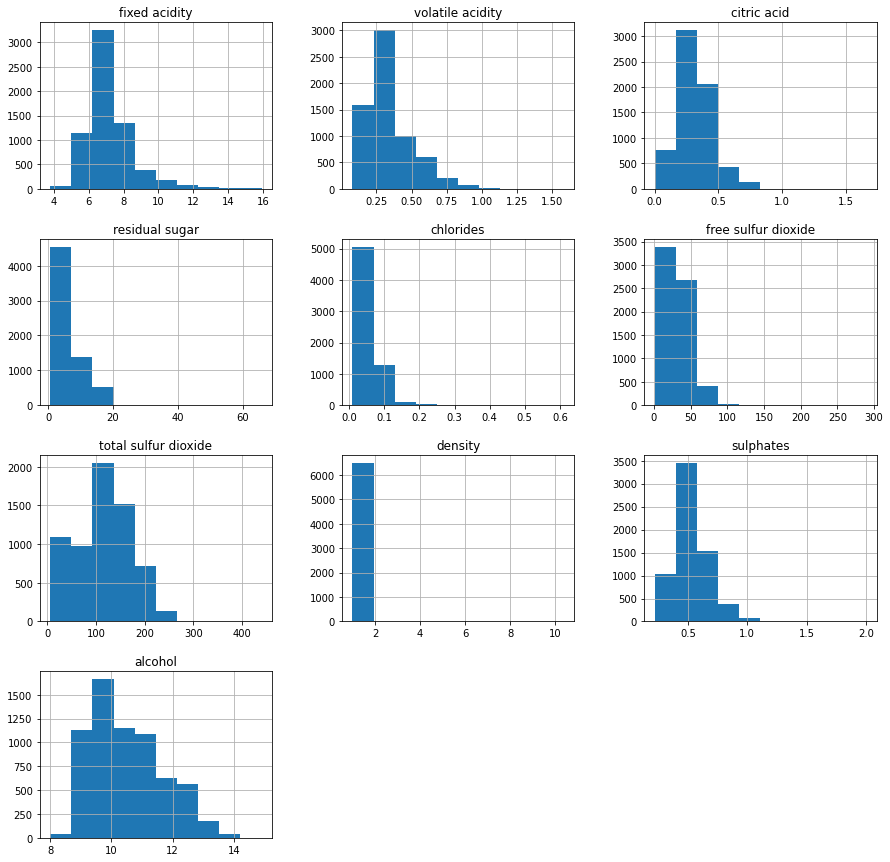

In [18]:
h = df.hist(figsize = (15,15))

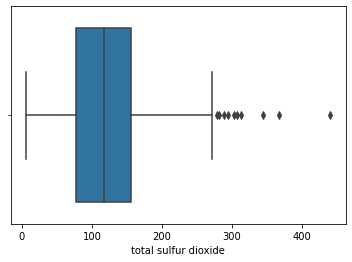

In [19]:
g=sns.boxplot(x=df['total sulfur dioxide'])

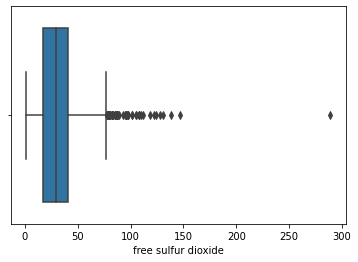

In [20]:
g=sns.boxplot(x=df['free sulfur dioxide'])

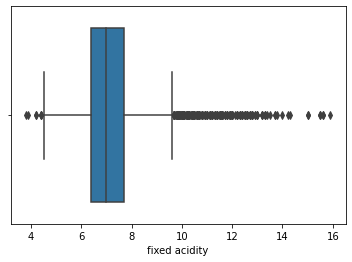

In [21]:
g=sns.boxplot(x=df['fixed acidity'])

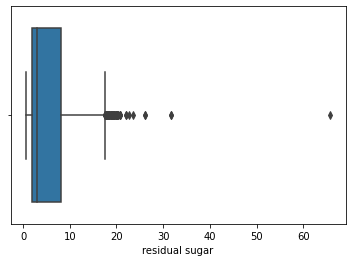

In [22]:
g=sns.boxplot(x=df['residual sugar'])

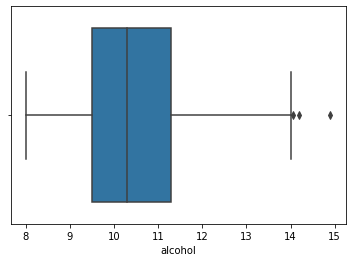

In [23]:
g=sns.boxplot(x=df['alcohol'])

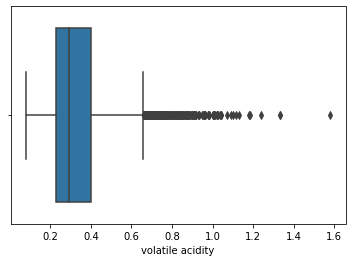

In [24]:
g=sns.boxplot(x=df['volatile acidity'])

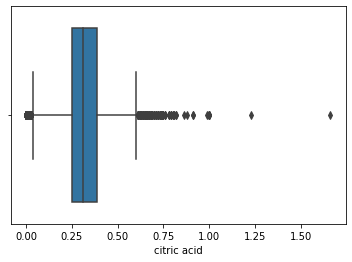

In [25]:
g=sns.boxplot(x=df['citric acid'])

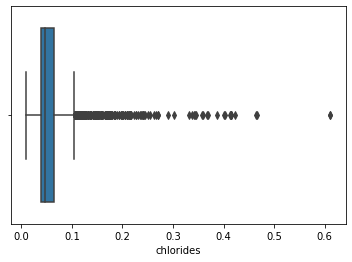

In [26]:
g=sns.boxplot(x=df['chlorides'])

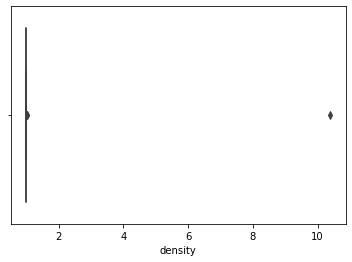

In [27]:
g=sns.boxplot(x=df['density'])

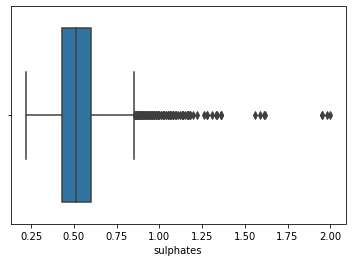

In [28]:
g=sns.boxplot(x=df['sulphates'])

<p>using interquartile range method to define and remove outliers<p/>


In [29]:
categorical = list(df.select_dtypes(include='object').columns)
numerical= list(df.select_dtypes(exclude='object').columns)
categorical, numerical


(['type', 'pHValue', 'taste'],
 ['fixed acidity',
  'volatile acidity',
  'citric acid',
  'residual sugar',
  'chlorides',
  'free sulfur dioxide',
  'total sulfur dioxide',
  'density',
  'sulphates',
  'alcohol'])

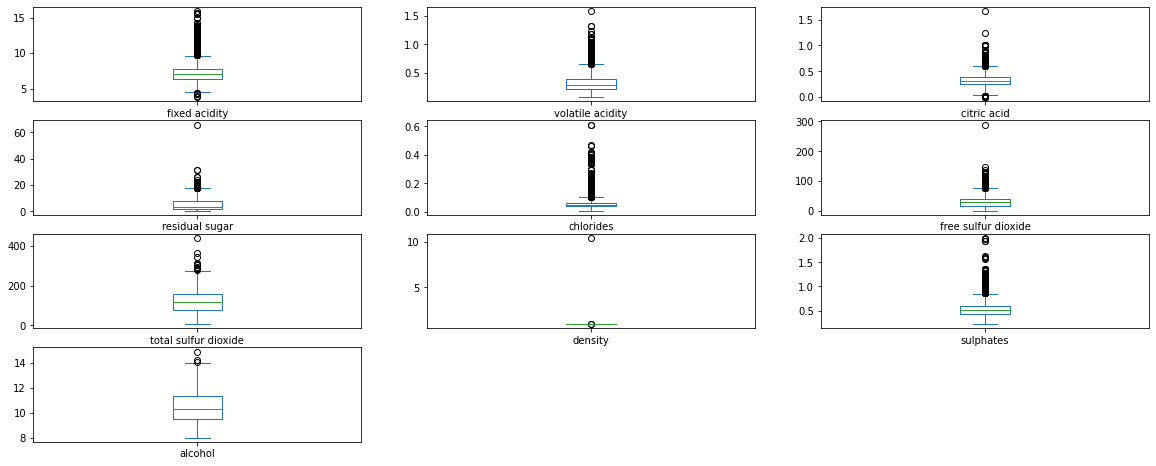

In [30]:
df[numerical].plot(kind='box', subplots=True, layout=(4,3), legend=True, figsize=(20,8))
plt.show()

In [31]:
def outlier_removal(feature):
    Q1 = df[feature].quantile(0.25)
    Q2 = df[feature].quantile(0.75)
    IQR = Q2 - Q1
    upper = Q2 + (1.5*IQR)
    lower = Q1 - (1.5*IQR)
    new =  df[(df[feature]>=lower) & (df[feature]<=upper)]
    return new

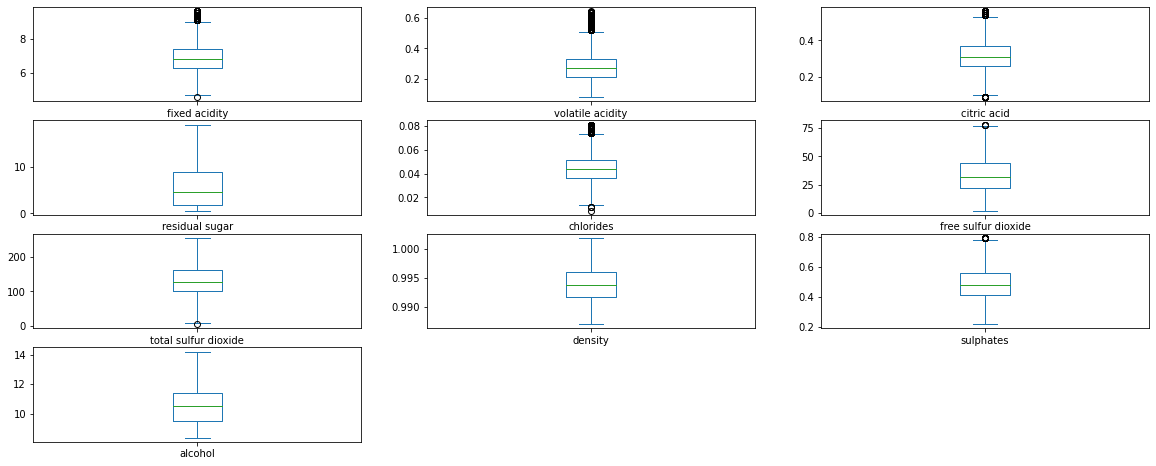

In [32]:
for columns in numerical:
    df = outlier_removal(columns)
    
df[numerical].plot(kind='box', subplots=True, layout=(4,3), legend=True, figsize=(20,8))
plt.show()

In [33]:
# determining the amount of rows changed 
# previous = (6497, 13) *initial (6498, 13) *

df.shape

(4654, 13)

In [34]:
df.dropna(inplace=True)

determining the counts of unique values for each categorical variable

In [35]:
df['type'].value_counts()

white    4286
red       368
Name: type, dtype: int64

In [36]:
df['pHValue'].value_counts()

very acidic        1978
quite acidic       1833
midly acidic        449
extremly acidic     342
acidic               46
lightly acidic        6
Name: pHValue, dtype: int64

In [37]:
df['taste'].value_counts()


normal    2121
bad       1482
good      1051
Name: taste, dtype: int64

<p>here we encode the categorical variable'pHValue' as dummy variables and encode 'taste' and 'type' variables using a mapping to obtain numerical values for them<p>


In [38]:
cat_ph = pd.get_dummies(df['pHValue'])

In [39]:
encode = {"taste": {"good": 1, "normal": 0,"bad": 0},
         "type": {"white": 1, "red": 0}}

In [40]:
#dropped ph to compare the effects of including ph and excluding pd
df = df.replace(encode)
df.drop(columns = ['pHValue'],inplace=True)

In [41]:
#new dataframe including ph cat encoded
combine = pd.concat([df, cat_ph],axis = 1)
combine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol,type,taste,acidic,extremly acidic,lightly acidic,midly acidic,quite acidic,very acidic
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,0.49,9.5,1,0,0,0,0,0,1,0
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,0.44,10.1,1,0,0,0,0,0,1,0
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,0.40,9.9,1,0,0,0,0,0,0,1
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,0.40,9.9,1,0,0,0,0,0,0,1
5,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,0.44,10.1,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6491,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,0.75,11.0,0,0,0,0,0,1,0,0
6494,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,0.76,11.2,0,0,0,0,0,1,0,0
6495,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,0.75,11.0,0,0,0,0,0,1,0,0
6496,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,0.71,10.2,0,0,0,0,0,1,0,0


In [42]:
cat = list(combine.select_dtypes(include='object').columns)
num = list(combine.select_dtypes(exclude='object').columns)
cat, num
combine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol,type,taste,acidic,extremly acidic,lightly acidic,midly acidic,quite acidic,very acidic
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,0.49,9.5,1,0,0,0,0,0,1,0
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,0.44,10.1,1,0,0,0,0,0,1,0
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,0.40,9.9,1,0,0,0,0,0,0,1
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,0.40,9.9,1,0,0,0,0,0,0,1
5,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,0.44,10.1,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6491,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,0.75,11.0,0,0,0,0,0,1,0,0
6494,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,0.76,11.2,0,0,0,0,0,1,0,0
6495,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,0.75,11.0,0,0,0,0,0,1,0,0
6496,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,0.71,10.2,0,0,0,0,0,1,0,0


In [43]:
combine['type'].value_counts()

1    4286
0     368
Name: type, dtype: int64

<p> 1 - white </p>
<p> 0 - red  </p>

In [44]:
combine['taste'].value_counts()

0    3603
1    1051
Name: taste, dtype: int64

<p> 1 - good </p>
<p> 0 - normal  </p>
<p> 0 - normal  </p>

<p> here we convert the values of the categorical variable 'pHValue' to dummy variables </p>

In [45]:
combine.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol,type,taste,acidic,extremly acidic,lightly acidic,midly acidic,quite acidic,very acidic
fixed acidity,1.000000,0.074142,0.260695,-0.000025,0.205592,-0.120953,-0.068517,0.276185,0.056942,-0.096021,-0.231552,-0.052694,-0.098278,0.180878,-0.060130,-0.128335,-0.164609,0.167902
volatile acidity,0.074142,1.000000,-0.232677,-0.057859,0.279876,-0.202038,-0.148637,0.091985,0.112550,0.052272,-0.467810,-0.072920,-0.033430,-0.102918,0.021797,0.058940,0.070696,-0.045645
citric acid,0.260695,-0.232677,1.000000,0.054792,-0.076793,0.107726,0.139584,0.041251,0.023420,0.022082,0.141970,0.031534,-0.066731,0.037293,-0.031146,-0.076364,-0.084526,0.125082
residual sugar,-0.000025,-0.057859,0.054792,1.000000,0.076408,0.387628,0.450700,0.740472,-0.104373,-0.439840,0.219651,-0.086661,-0.053006,0.090361,-0.026775,-0.133831,-0.105773,0.149329
chlorides,0.205592,0.279876,-0.076793,0.076408,1.000000,-0.050224,-0.037534,0.509101,0.235420,-0.444506,-0.579077,-0.232155,0.047801,-0.070894,0.015815,0.105078,0.055021,-0.090433
free sulfur dioxide,-0.120953,-0.202038,0.107726,0.387628,-0.050224,1.000000,0.659630,0.246989,-0.045403,-0.234723,0.298227,-0.015064,-0.003422,-0.025025,-0.015703,-0.052061,-0.066260,0.111617
total sulfur dioxide,-0.068517,-0.148637,0.139584,0.450700,-0.037534,0.659630,1.000000,0.358981,-0.063240,-0.386791,0.495440,-0.118440,-0.016480,-0.041727,-0.006939,-0.108428,-0.084214,0.173821
density,0.276185,0.091985,0.041251,0.740472,0.509101,0.246989,0.358981,1.000000,0.141261,-0.793823,-0.189049,-0.279177,0.016958,-0.002184,0.001708,0.034040,-0.035196,0.012092
sulphates,0.056942,0.112550,0.023420,-0.104373,0.235420,-0.045403,-0.063240,0.141261,1.000000,-0.032331,-0.326364,0.017739,0.084086,-0.129237,0.018739,0.142308,0.092735,-0.126622
alcohol,-0.096021,0.052272,0.022082,-0.439840,-0.444506,-0.234723,-0.386791,-0.793823,-0.032331,1.000000,0.002678,0.377291,0.007556,-0.017369,0.021112,0.013588,0.063534,-0.064788


In [46]:
combine.shape

(4654, 18)

In [47]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol,type,taste
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,0.49,9.5,1,0
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,0.44,10.1,1,0
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,0.40,9.9,1,0
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,0.40,9.9,1,0
5,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,0.44,10.1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6491,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,0.75,11.0,0,0
6494,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,0.76,11.2,0,0
6495,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,0.75,11.0,0,0
6496,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,0.71,10.2,0,0


## Decision Tree Model (Model 1)

#### using Standard Sklearn library

<b> Split training and testing data <b>

<b> build with ph <b>

In [64]:
X_cat = combine.drop('taste',axis = 1)
y_cat = combine['taste'] 
X = df.drop('taste',axis = 1)
y = df['taste']

In [65]:
## Scikit learn's DT 
X_train, X_test, y_train, y_test = train_test_split(X_cat, 
                                                   y_cat, 
                                                    test_size = 0.2, 
                                                    random_state=1)

model = DecisionTreeClassifier(max_depth=10)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10)

<b> performance report <b>

In [66]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
y_pred = model.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[605 122]
 [ 96 108]]
              precision    recall  f1-score   support

           0       0.86      0.83      0.85       727
           1       0.47      0.53      0.50       204

    accuracy                           0.77       931
   macro avg       0.67      0.68      0.67       931
weighted avg       0.78      0.77      0.77       931

0.765843179377014


 <b> build without ph <b>

In [67]:
# splitting training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)
# building model with sklearn
model = DecisionTreeClassifier(max_depth = 10)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10)

<b> performance report (without ph) <b>

In [68]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
y_pred = model.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[615 112]
 [102 102]]
              precision    recall  f1-score   support

           0       0.86      0.85      0.85       727
           1       0.48      0.50      0.49       204

    accuracy                           0.77       931
   macro avg       0.67      0.67      0.67       931
weighted avg       0.77      0.77      0.77       931

0.7701396348012889


### Building model using my own implementation

<b> buld with ph <b>

In [53]:
from DT_Humaira_Qadeer import DecisionTreeModel
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
X_cat = combine.drop('taste',axis = 1)
y_cat = combine['taste'] 
# splitting training and testing data
X_train, X_test, y_train, y_test = train_test_split(X_cat, y_cat, test_size = 0.2, random_state=1)
# building model with sklearn
model = DecisionTreeClassifier(max_depth = 10)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10)

#### calling performance report

In [54]:
from DT_Humaira_Qadeer import DecisionTreeModel
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
y_pred = model.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print("accuracy: ",accuracy_score(y_test, y_pred))

[[614 113]
 [ 93 111]]
              precision    recall  f1-score   support

           0       0.87      0.84      0.86       727
           1       0.50      0.54      0.52       204

    accuracy                           0.78       931
   macro avg       0.68      0.69      0.69       931
weighted avg       0.79      0.78      0.78       931

accuracy:  0.7787325456498388


<b> build without ph <b>

In [57]:
from DT_Humaira_Qadeer import DecisionTreeModel
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)
# building model with sklearn
model = DecisionTreeClassifier(max_depth = 10)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10)

#### calling performance report

In [59]:
from DT_Humaira_Qadeer import DecisionTreeModel
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
y_pred = model.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print("accuracy: ",accuracy_score(y_test, y_pred))

[[614 113]
 [ 93 111]]
              precision    recall  f1-score   support

           0       0.87      0.84      0.86       727
           1       0.50      0.54      0.52       204

    accuracy                           0.78       931
   macro avg       0.68      0.69      0.69       931
weighted avg       0.79      0.78      0.78       931

accuracy:  0.7765843179377014


## Random Forest Model (Model 2) *ensemble model*

#### using Standard Sklearn library

<b> build with ph <b> 

In [69]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
X_cat = combine.drop('taste',axis = 1)
y_cat = combine['taste'] 
X_train, X_test, y_train, y_test = train_test_split(X_cat, y_cat, test_size = 0.2, random_state=1)

rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, rfc_pred))
print(accuracy_score(y_test, rfc_pred))

[[615 112]
 [102 102]]
              precision    recall  f1-score   support

           0       0.90      0.94      0.92       727
           1       0.76      0.62      0.68       204

    accuracy                           0.87       931
   macro avg       0.83      0.78      0.80       931
weighted avg       0.87      0.87      0.87       931

0.8732545649838883


### building random forest using my own implementation

<b> build with ph <b>

In [70]:
from DT_Humaira_Qadeer import RandomForestModel
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X_cat, y_cat, test_size = 0.2, random_state=1)
rfc = RandomForestModel(n_estimators=25)
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, rfc_pred))
print("accuracy:",accuracy_score(y_test, rfc_pred))

Done fitting
Done fitting
Done fitting
Done fitting
Done fitting
Done fitting
Done fitting
Done fitting
Done fitting
Done fitting
Done fitting
Done fitting
Done fitting
Done fitting
Done fitting
Done fitting
Done fitting
Done fitting
Done fitting
Done fitting
Done fitting
Done fitting
Done fitting
Done fitting
Done fitting
[[615 112]
 [102 102]]
              precision    recall  f1-score   support

           0       0.89      0.94      0.91       727
           1       0.72      0.58      0.64       204

    accuracy                           0.86       931
   macro avg       0.80      0.76      0.78       931
weighted avg       0.85      0.86      0.85       931

accuracy: 0.8571428571428571


<b> build without ph <b>

In [71]:
from DT_Humaira_Qadeer import RandomForestModel
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X_cat, y_cat, test_size = 0.2, random_state=1)
rfc = RandomForestModel(n_estimators=25)
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, rfc_pred))
print("accuracy:",accuracy_score(y_test, rfc_pred))

Done fitting
Done fitting
Done fitting
Done fitting
Done fitting
Done fitting
Done fitting
Done fitting
Done fitting
Done fitting
Done fitting
Done fitting
Done fitting
Done fitting
Done fitting
Done fitting
Done fitting
Done fitting
Done fitting
Done fitting
Done fitting
Done fitting
Done fitting
Done fitting
Done fitting
[[615 112]
 [102 102]]
              precision    recall  f1-score   support

           0       0.89      0.93      0.91       727
           1       0.70      0.57      0.63       204

    accuracy                           0.85       931
   macro avg       0.79      0.75      0.77       931
weighted avg       0.84      0.85      0.85       931

accuracy: 0.8517722878625135


## Logistic Regression Model (Model 3)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X_cat, y_cat, test_size = 0.2, random_state=1)
model = LogisticRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

#### Check 10-fold cross validation

In [ ]:
from sklearn.metrics import r2_score

import random
r2 = []
for i in range(10):

    X_train, X_test, y_train, y_test = train_test_split(X_cat, y_cat, test_size = 0.2, random_state=1)
    model = LogisticRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = r2_score(y_test, y_pred)
    r2.append(score)
    print('Trial: {}, R^2: {}, Slope: {}, Intercept: {}'.format(
        i, score, model.coef_, model.intercept_
    ))

rdf = pd.DataFrame( {'trial': range(10), 'Rsquare': r2})
rdf.plot.bar(x='trial', y='Rsquare')
print(confusion_matrix(y_test, y_pred))

### Random forest model for red wine vs white wine

In [ ]:
wine = combine.copy()
wine.shape

In [ ]:
wine['type'].value_counts()

#### red wine random forest

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
#split training and testing for red wine and taste
X_red = wine[wine['type'] == 0]
X_red_type = X_red.drop('taste', axis=1)
y_red = X_red['taste']
X_train, X_test, y_train, y_test = train_test_split(X_red_type,y_red, test_size = 0.2, random_state=1)

rfc = RandomForestClassifier(n_estimators=25)
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)
print(confusion_matrix(y_test,rfc_pred))
print(classification_report(y_test, rfc_pred))
print(accuracy_score(y_test, rfc_pred))

### white wine random forest

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
#split training and testing for white wine and taste
X_white = wine[wine['type'] == 1]
X_white_type = X_white.drop('taste', axis=1)
y_white = X_white['taste']
X_train, X_test, y_train, y_test = train_test_split(X_white_type, y_white, test_size = 0.2, random_state=1)

rfc = RandomForestClassifier(n_estimators=25)
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)
print(confusion_matrix(y_test,rfc_pred))
print(classification_report(y_test, rfc_pred))
print(accuracy_score(y_test, rfc_pred))

## Observations

My models included Random Forest, Decision Tree, and Logistic regression.

<p> Random forest and decision tree were modelled based upon data including ph and data excluding ph. <p/> 

<b> * Compare the sklearn Decision Tree with your own Decision Tree implementation results <b>

<p>The sklearn decision tree and my own decision tree had only a slight difference
in accuracy, sklearns being less accurate <p/>

<b> * Include at least one ensemble models<b>
<p> I included random forest models with and without ph as my ensemble model implementation <p/>
<b> * Identify out of all those you have tried, which one is the best model.<b>
<p> Out of all the models I tried. The Random Forest model was observed to be the  accurate model <p/>

* For the best fitted model, does it work better for the Red wine or White wine or similar

<p> I applied the random forest model to both red wine and white wine types in correlation to taste, and observed only a slight difference between the red and white wine accuracy. The modelling of red wine turned out to be more accurate than the model for white wine.<p/>
* Can ensemble methods improve your models?
<p> Ensemble method mitigate the errors created by weaker models by learning from previous errors in estimation and correcting them. Therefore, I do believe ensemble methods definitely provide improvements in models that are expected to perform poorly on their own, and I observed that by the difference in accuracy between random forest and decision trees, random forest being more accurate. <p/>

Whether the categorical variable pH Value is important or not. If it is important, and you need to make a prediction for one instance where the pH value is missing, how would you proceed?

<p> My models included the behavior of the categorical variable pHValue using random forest and decision trees as well as models that excluded pHValue and i observed that the variable had only a slight effect on the accuracy of the scores. Models that included the variable were observed to be more accurate. 